# Additional Functionalities

In [1]:
import pandas as pd
data = pd.read_csv("MIMIC-WHOLE.csv")

Newly added functionalities need those packages (for drawing risk score card):
* `Pillow==9.4.0`
* `matplotlib==3.7.0`

In [2]:
from fasterrisk.wrapper import FasterRisk
from fasterrisk.binarization_util import BinBinarizer

X, y = data.drop('hospital_expire_flag', axis=1), data['hospital_expire_flag']
X.head()

,preiculos,age,gcs_min,mechvent,urineoutput,heartrate_min,heartrate_max,meanbp_min,meanbp_max,resprate_min,...,pao2fio2_vent_min,admissiontype,pao2_max,pao2_min,paco2_max,paco2_min,ph_min,ph_max,aado2_min,aado2_max
0,4777.0,43.0,15.0,0,3980.0,68.0,118.0,77.000000,103.0,14.0,...,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,50.0,15.0,0,1050.0,77.0,120.0,56.000000,119.0,9.0,...,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,238.0,38.0,15.0,1,2000.0,101.0,116.0,56.666698,91.0,8.0,...,NaN,0,458.0,139.0,52.0,34.0,7.21,7.47,284.0,284.0
3,286.0,80.0,15.0,0,1145.0,46.0,76.0,51.000000,73.0,12.0,...,NaN,0,168.0,80.0,41.0,27.0,7.36,7.42,NaN,NaN
4,1.0,75.0,13.0,0,3040.0,67.0,92.0,69.000000,104.0,12.0,...,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)
X_train.head()

,preiculos,age,gcs_min,mechvent,urineoutput,heartrate_min,heartrate_max,meanbp_min,meanbp_max,resprate_min,...,pao2fio2_vent_min,admissiontype,pao2_max,pao2_min,paco2_max,paco2_min,ph_min,ph_max,aado2_min,aado2_max
26814,1089.0,86.0,14.0,0,455.0,61.0,102.0,64.0,113.0,12.0,...,NaN,2,300.0,63.0,49.0,36.0,7.27,7.31,NaN,NaN
5589,1.0,40.0,15.0,1,4145.0,83.0,121.0,78.0,124.0,11.0,...,188.000000,1,94.0,94.0,38.0,38.0,7.38,7.38,NaN,NaN
17447,175.0,66.0,15.0,1,750.0,71.0,114.0,51.0,84.0,10.0,...,242.499996,0,469.0,97.0,47.0,39.0,7.32,7.38,NaN,NaN
11968,1.0,22.0,15.0,0,500.0,92.0,116.0,56.0,89.0,16.0,...,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29616,576.0,64.0,15.0,1,1140.0,73.0,95.0,61.0,98.0,13.0,...,209.999997,0,389.0,84.0,54.0,37.0,7.25,7.38,562.0,562.0


Apply binarization, `interval_width` can be any (as long as it divides 100)

If `group_sparsity=True`, returns group indices for every feature as well, else `None`

In [4]:
binarizer = BinBinarizer(interval_width=10, whether_interval=False, group_sparsity=True)
X_train_binarized, group_idx = binarizer.fit_transform(X_train)     # binarize features based on training data
print(len(X_train_binarized.columns))
list(X_train_binarized.columns)[:33]       # note that NaN is created as an additional column for every feature, in case there is missing value

492


['preiculos_isNaN',
 'preiculos<=348.0',
 'preiculos<=906.0',
 'preiculos<=1502.0',
 'preiculos<=2403.0',
 'preiculos<=3306.0',
 'preiculos<=4451.0',
 'preiculos<=6050.0',
 'preiculos<=8405.0',
 'preiculos<=12933.0',
 'preiculos<=152477.0',
 'age_isNaN',
 'age<=22.0',
 'age<=30.0',
 'age<=37.0',
 'age<=45.0',
 'age<=52.0',
 'age<=59.0',
 'age<=67.0',
 'age<=74.0',
 'age<=82.0',
 'age<=89.0',
 'gcs_min_isNaN',
 'gcs_min<=3.0',
 'gcs_min<=5.0',
 'gcs_min<=6.0',
 'gcs_min<=7.0',
 'gcs_min<=9.0',
 'gcs_min<=10.0',
 'gcs_min<=11.0',
 'gcs_min<=12.0',
 'gcs_min<=14.0',
 'gcs_min<=15.0']

In [5]:
group_idx

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,
        3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11,
       11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13,
       13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14,
       14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 16, 16,
       16, 16, 16, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 17, 17,
       17, 17, 17, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 19, 19, 19,
       19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20, 20, 20, 20, 20,
       20, 20, 21, 21, 21

Train FasterRisk

In [6]:
from sklearn.metrics import roc_auc_score
fasterrisk = FasterRisk(k=25, lb=-90, ub=90, group_sparsity=10, featureIndex_to_groupIndex=group_idx)
fasterrisk.fit(X_train_binarized[:5000], y_train.iloc[:5000])      # fit on 5000 patients for demo purpose

X_test_binarized, _ = binarizer.transform(X_test)       # binarize test data based on thresholds obtained from training data
y_prob = fasterrisk.predict_proba(X_test_binarized)       # predict probability of death
roc_auc_score(y_test, y_prob)       # compute AUC

0.8050932293201706

Visualize card (`model_idx` specifies which model you want to visualize, `0` being the top model with smallest logistic loss, `1` being the second top one with smallest loss..etc)

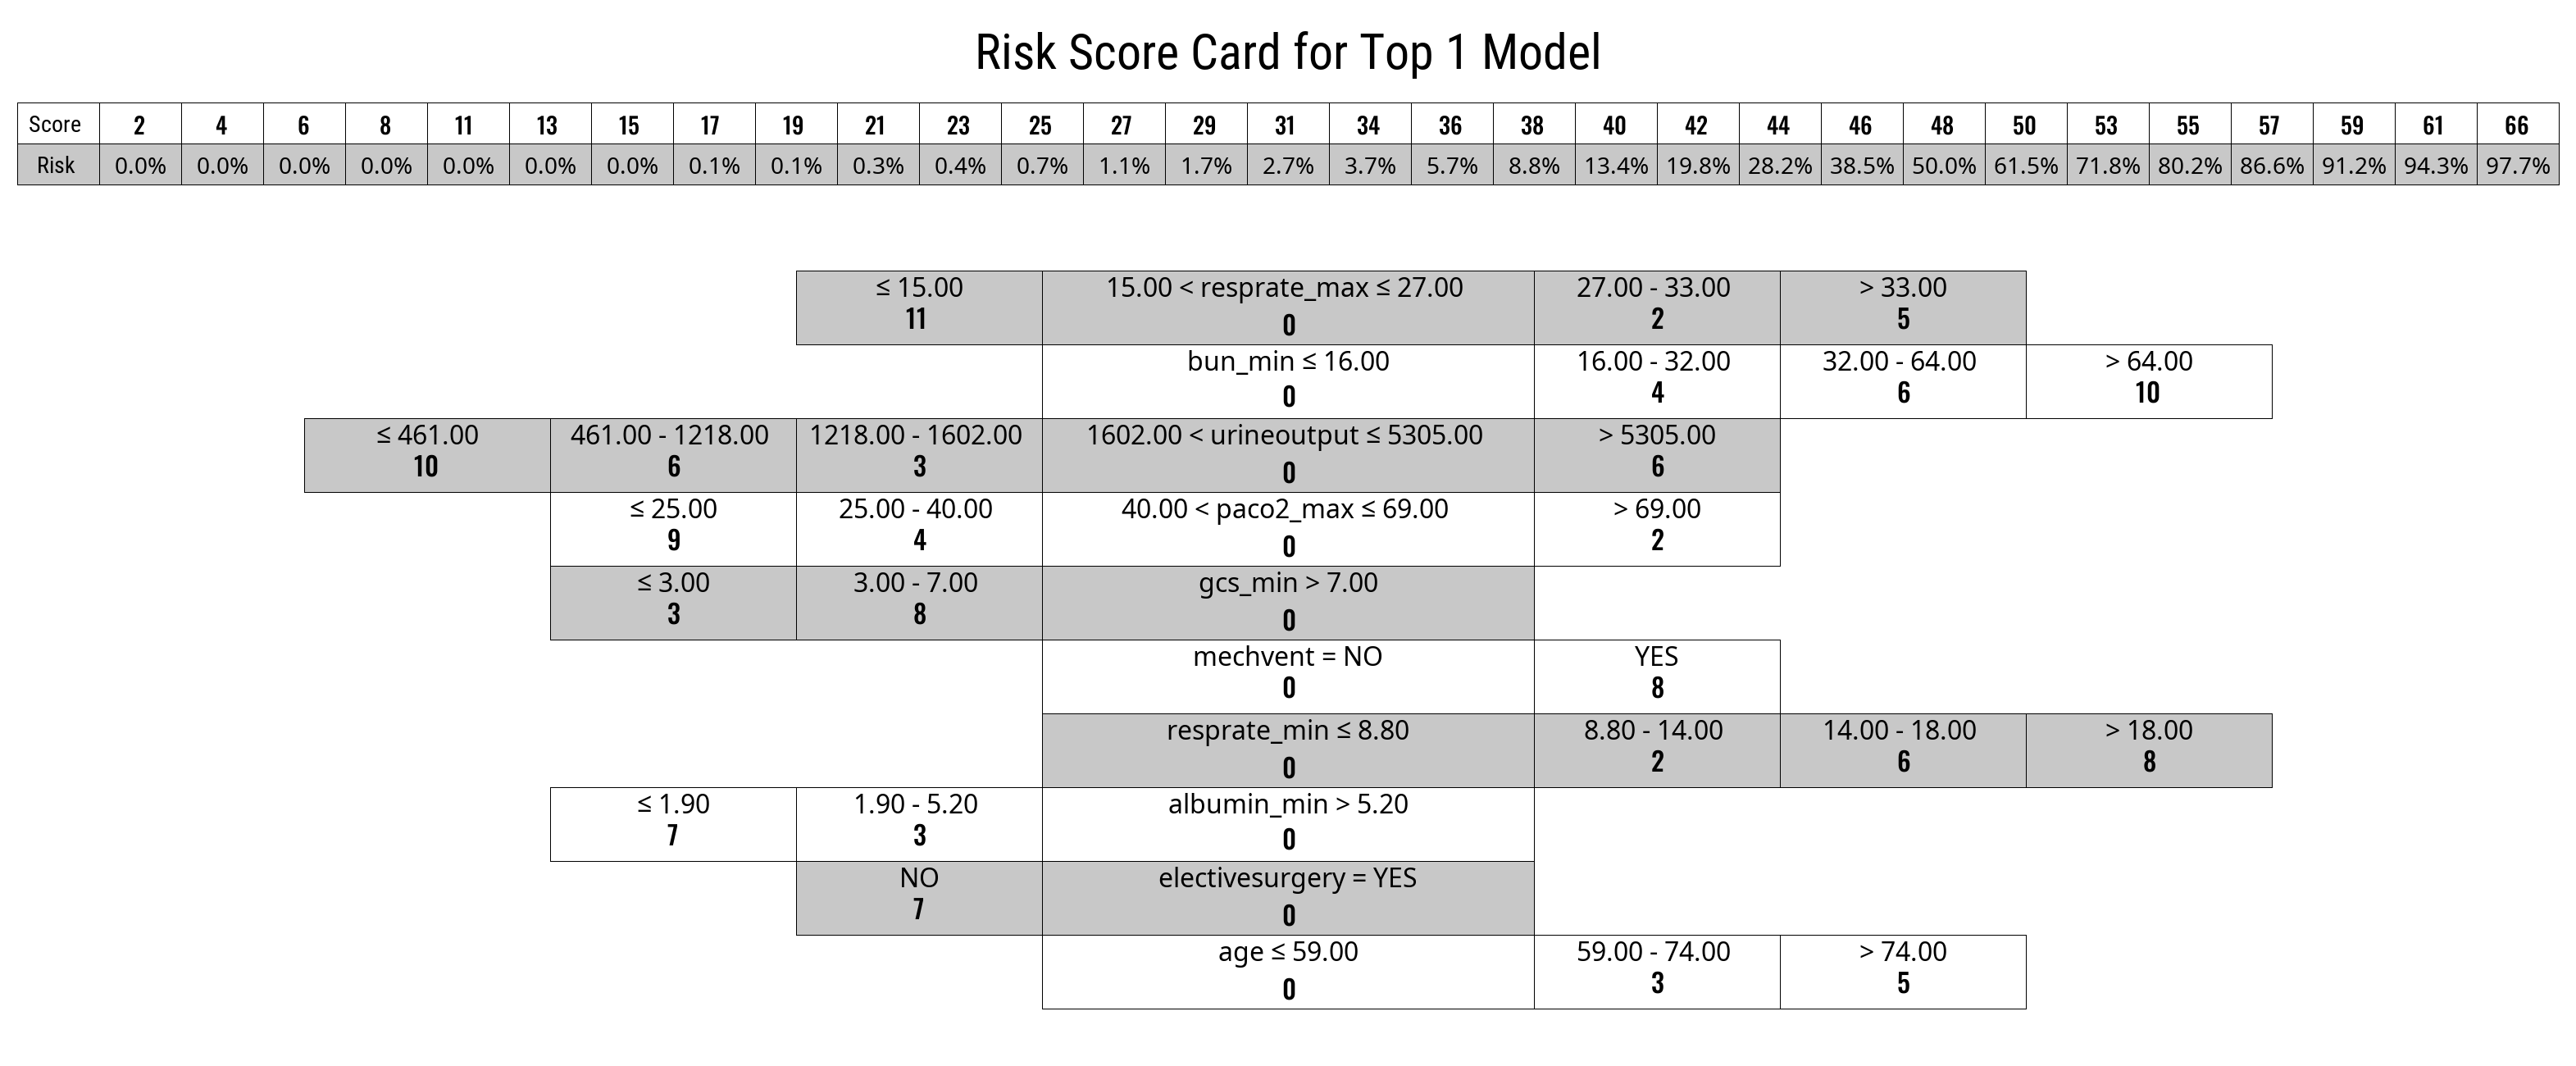

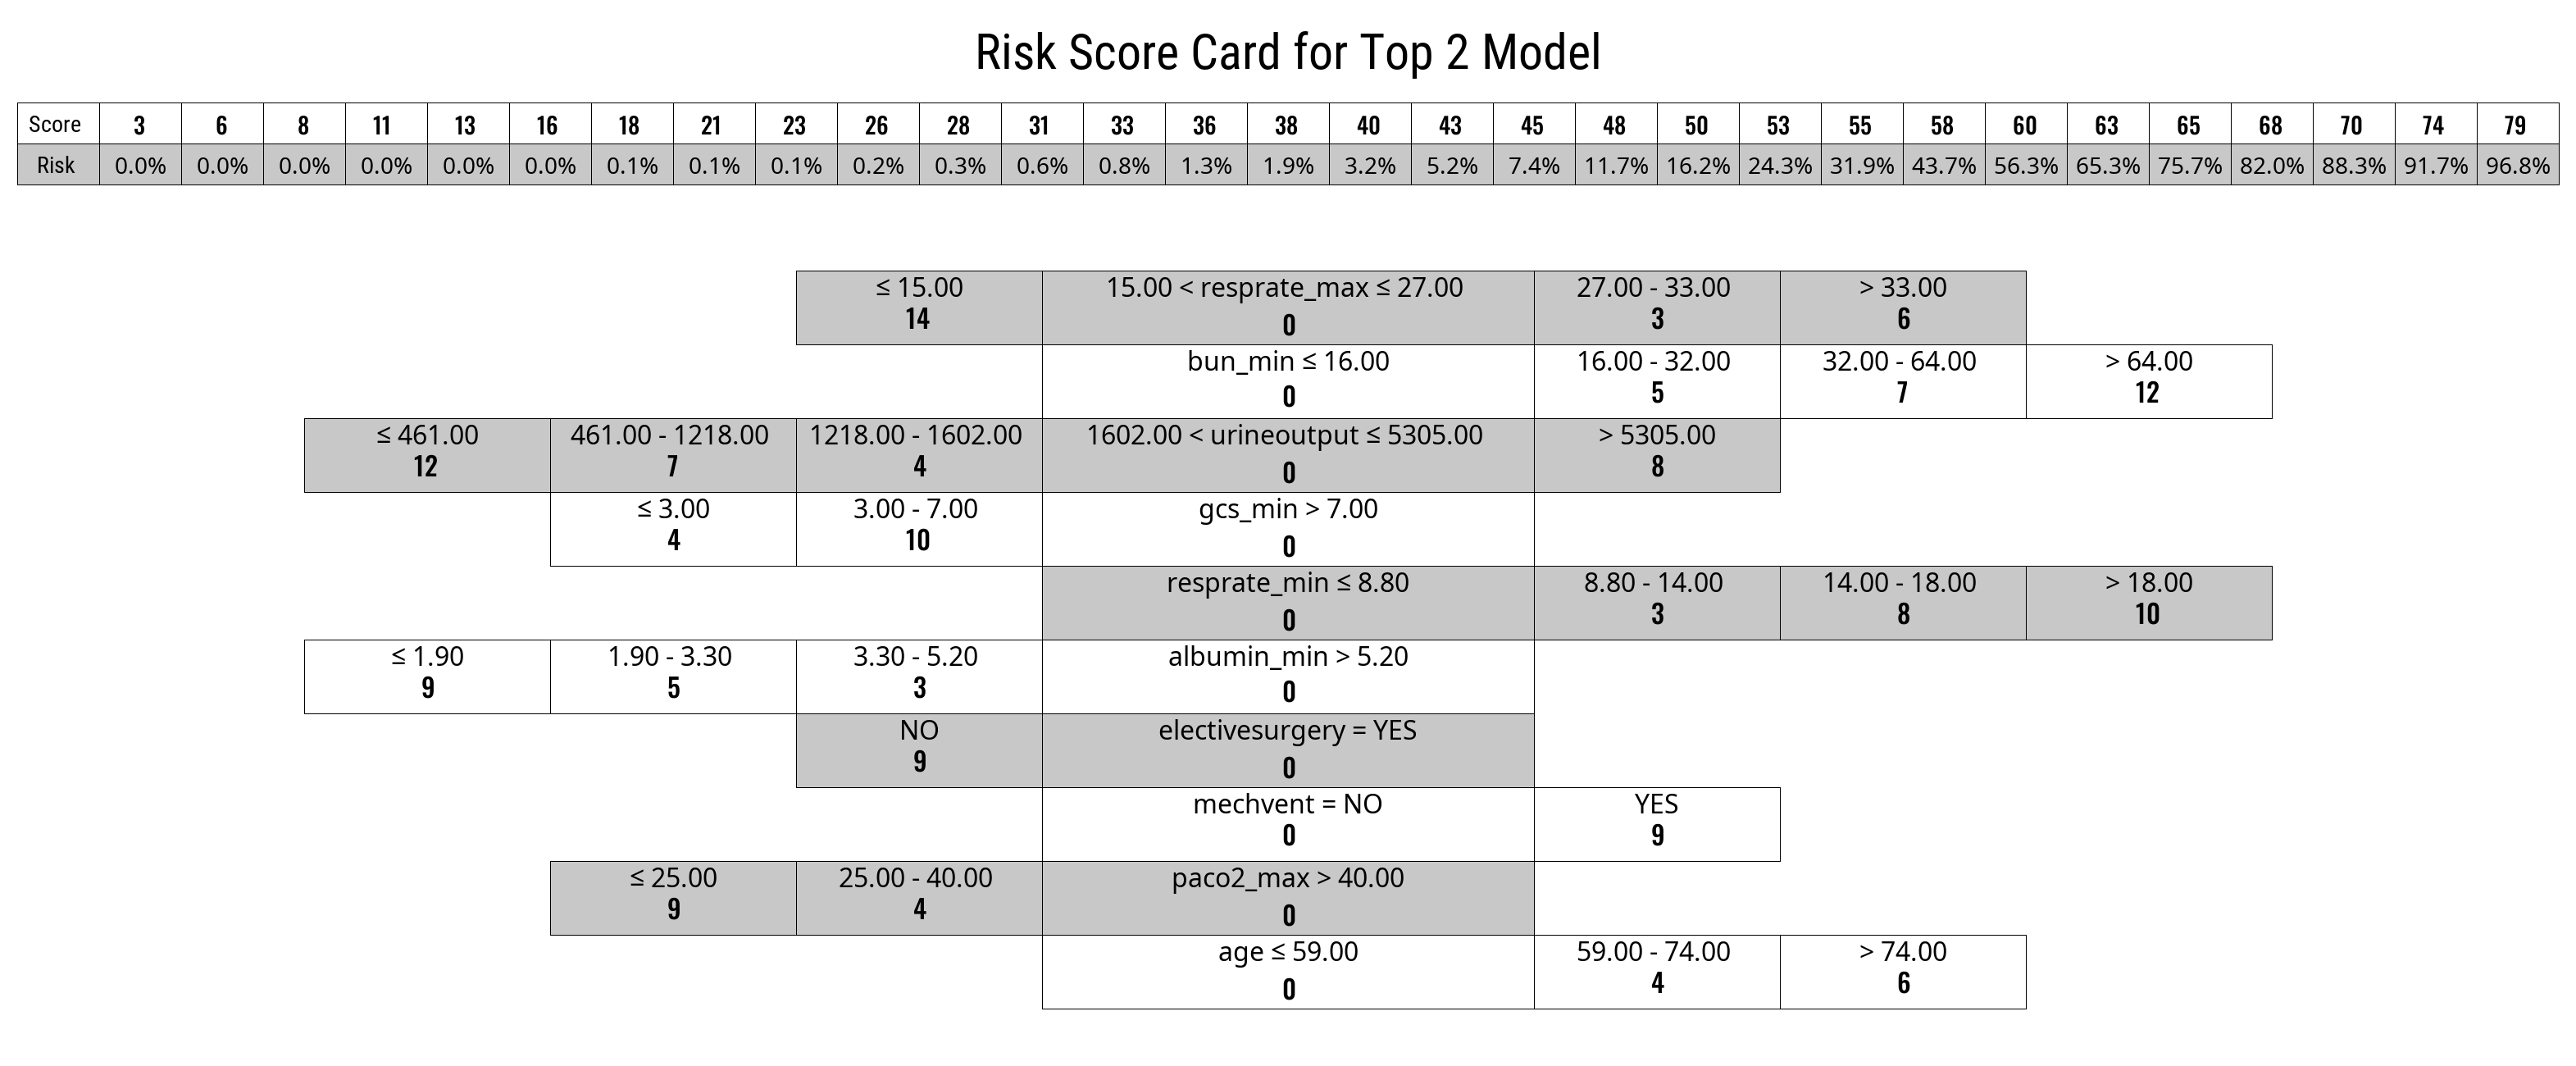

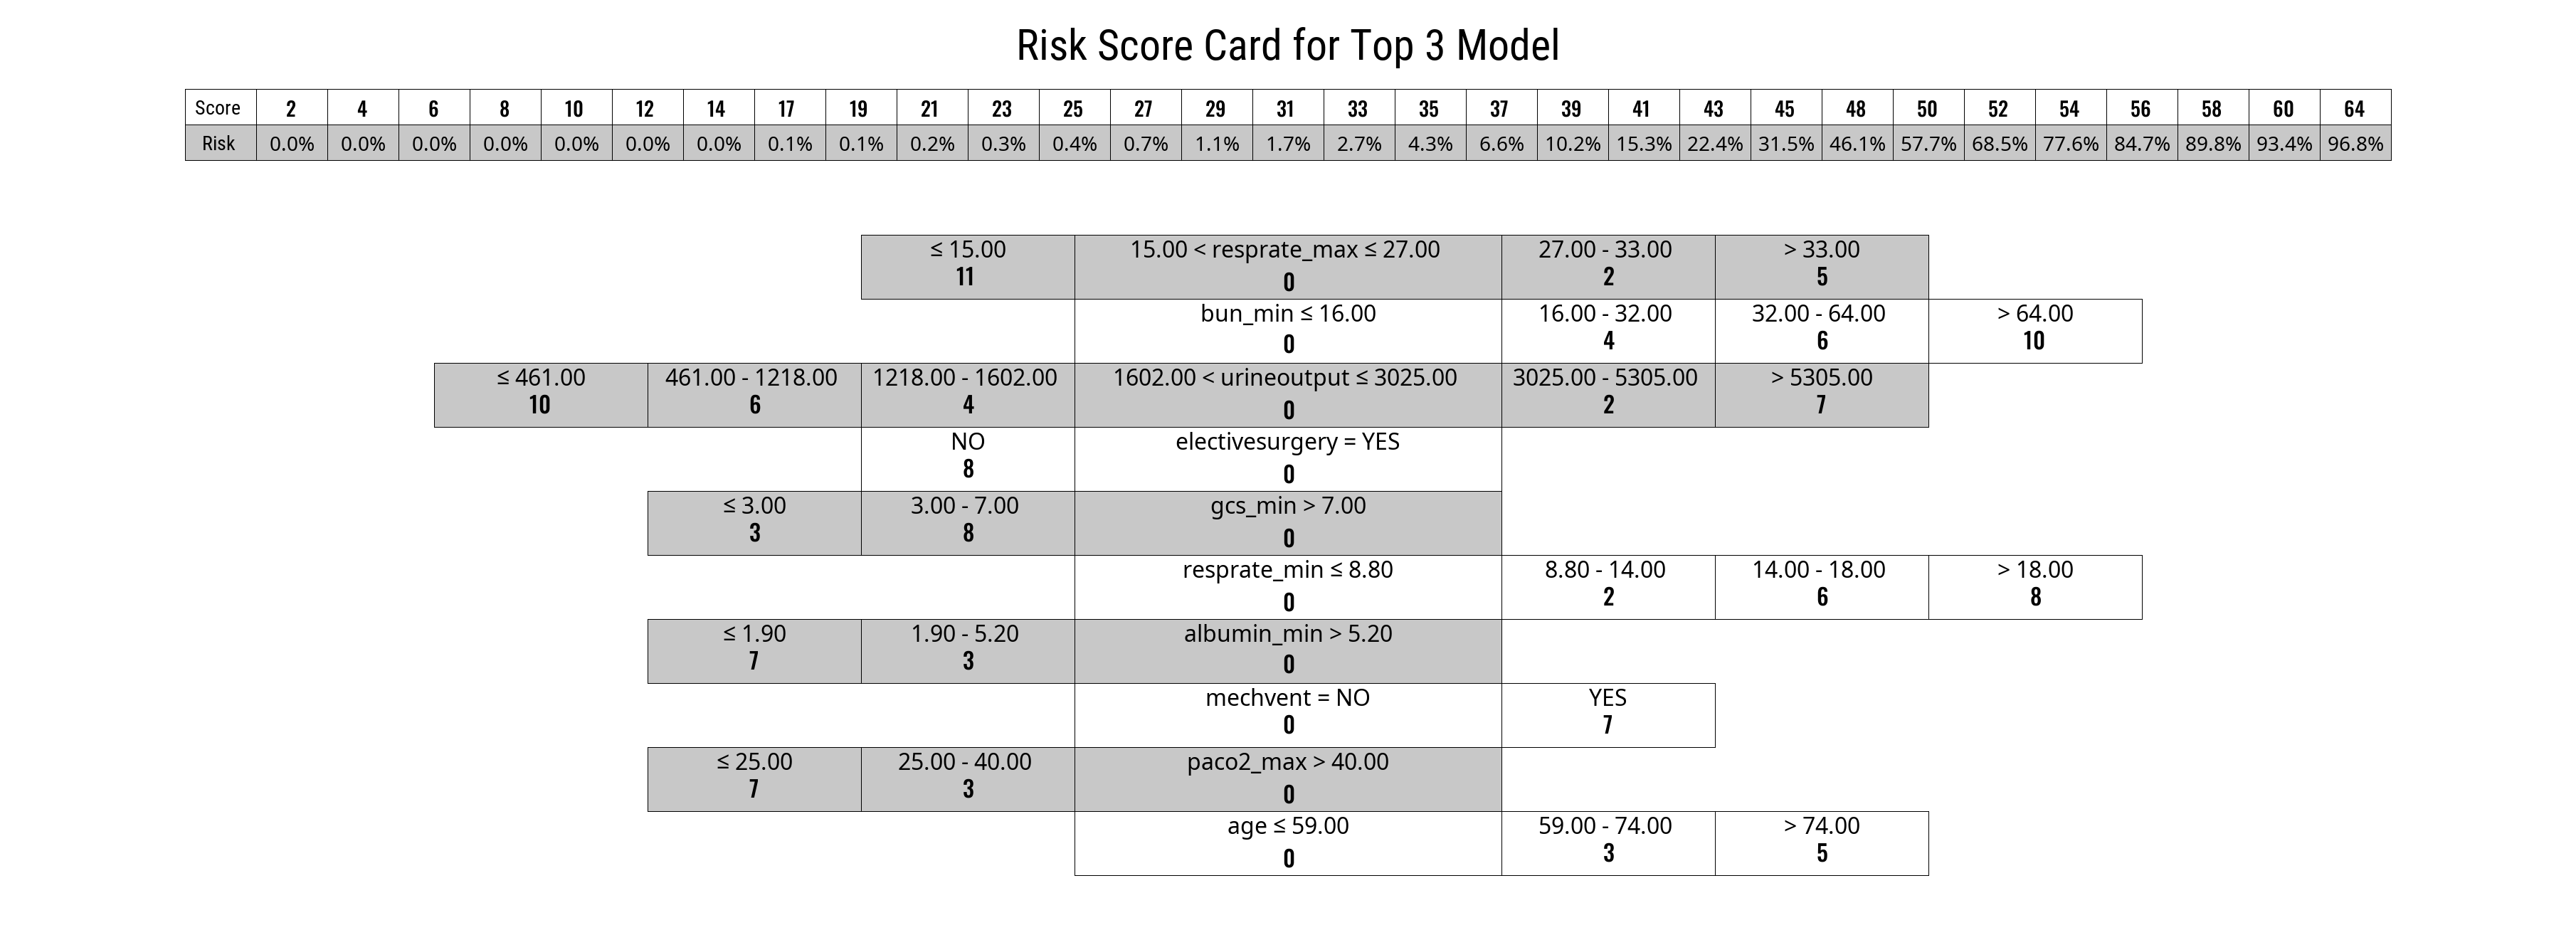

In [7]:
from IPython.display import display
names = list(X_train_binarized.columns)
for i in range(3):
    card = fasterrisk.visualize_risk_card(names, X_train_binarized, model_idx=i, title=f'Risk Score Card for Top {i+1} Model')      
    display(card)

Obtain model parameters

In [8]:
multipliers, beta0, betas = fasterrisk.get_model_params()
len(multipliers), len(beta0), len(betas)            # number of models

(50, 50, 50)

Get card in printed format

In [9]:
for i in range(3):
    print(f"{'='*30} Model {i+1} {'='*30}")
    fasterrisk.print_risk_card(names, X_train_binarized, model_idx=i)      # print risk card for the top model (with smallest logistic loss)
    print("\n")

============================== Model 1 ==============================
The Risk Score is:
1.                             age<=59.0     -3 point(s) |   ...
2.                             age<=74.0     -2 point(s) | + ...
3.                          gcs_min<=3.0     -5 point(s) | + ...
4.                          gcs_min<=7.0      8 point(s) | + ...
5.                           mechvent<=0     -8 point(s) | + ...
6.                    urineoutput<=461.0      4 point(s) | + ...
7.                   urineoutput<=1218.0      3 point(s) | + ...
8.                   urineoutput<=1602.0      3 point(s) | + ...
9.                   urineoutput<=5305.0     -6 point(s) | + ...
10.       resprate_min<=8.800000190734863     -2 point(s) | + ...
11.                    resprate_min<=14.0     -4 point(s) | + ...
12.                    resprate_min<=18.0     -2 point(s) | + ...
13.                    resprate_max<=15.0     11 point(s) | + ...
14.                    resprate_max<=27.0     -2 point(s) | + 

## Further modify card with user-defined box constraints (to include domain knowledge)
**Example**:
Due to issue with training data, we observe that `gcs_min` gets lower risk when patient has a score with 3, which doesn't make sense. Let us try to change by adding user-defined constraints. In addition, those constraints can also be used to enforce monotonicity in component scores, in particular:
- **monotonically decreasing**: set all box constraints for a particular feature **positive**
- **monotonically increasing**: set all box constraints for a particular feature **negative**

In this example, since `gcs_min<=3.0` is the outlier due to problems with training data, we enforce its box constraint to be positive

In [17]:
user_defined_pairs = {
    "gcs_min<=3.0": (0, 90)  # first is lb, second is ub, setting to (0, 90) forces coefficient for gcs_min<=3.0 to be positive, thus must have higher score than gcs_min>3.0 if feature gets selected
}
lb_list, ub_list = fasterrisk.define_bounds(X_train_binarized, feature_bound_pairs=user_defined_pairs, lb_else=-90, ub_else=90)

In [18]:
fasterrisk = FasterRisk(k=25, lb=lb_list, ub=ub_list, group_sparsity=10, featureIndex_to_groupIndex=group_idx)          # this time we pass a list of lb and ub
fasterrisk.fit(X_train_binarized[:5000], y_train.iloc[:5000])      # fit on 5000 patients for demo purpose

X_test_binarized, _ = binarizer.transform(X_test)       # binarize test data based on thresholds obtained from training data
y_prob = fasterrisk.predict_proba(X_test_binarized)       # predict probability of death
roc_auc_score(y_test, y_prob)       # compute AUC

0.8059317294489612

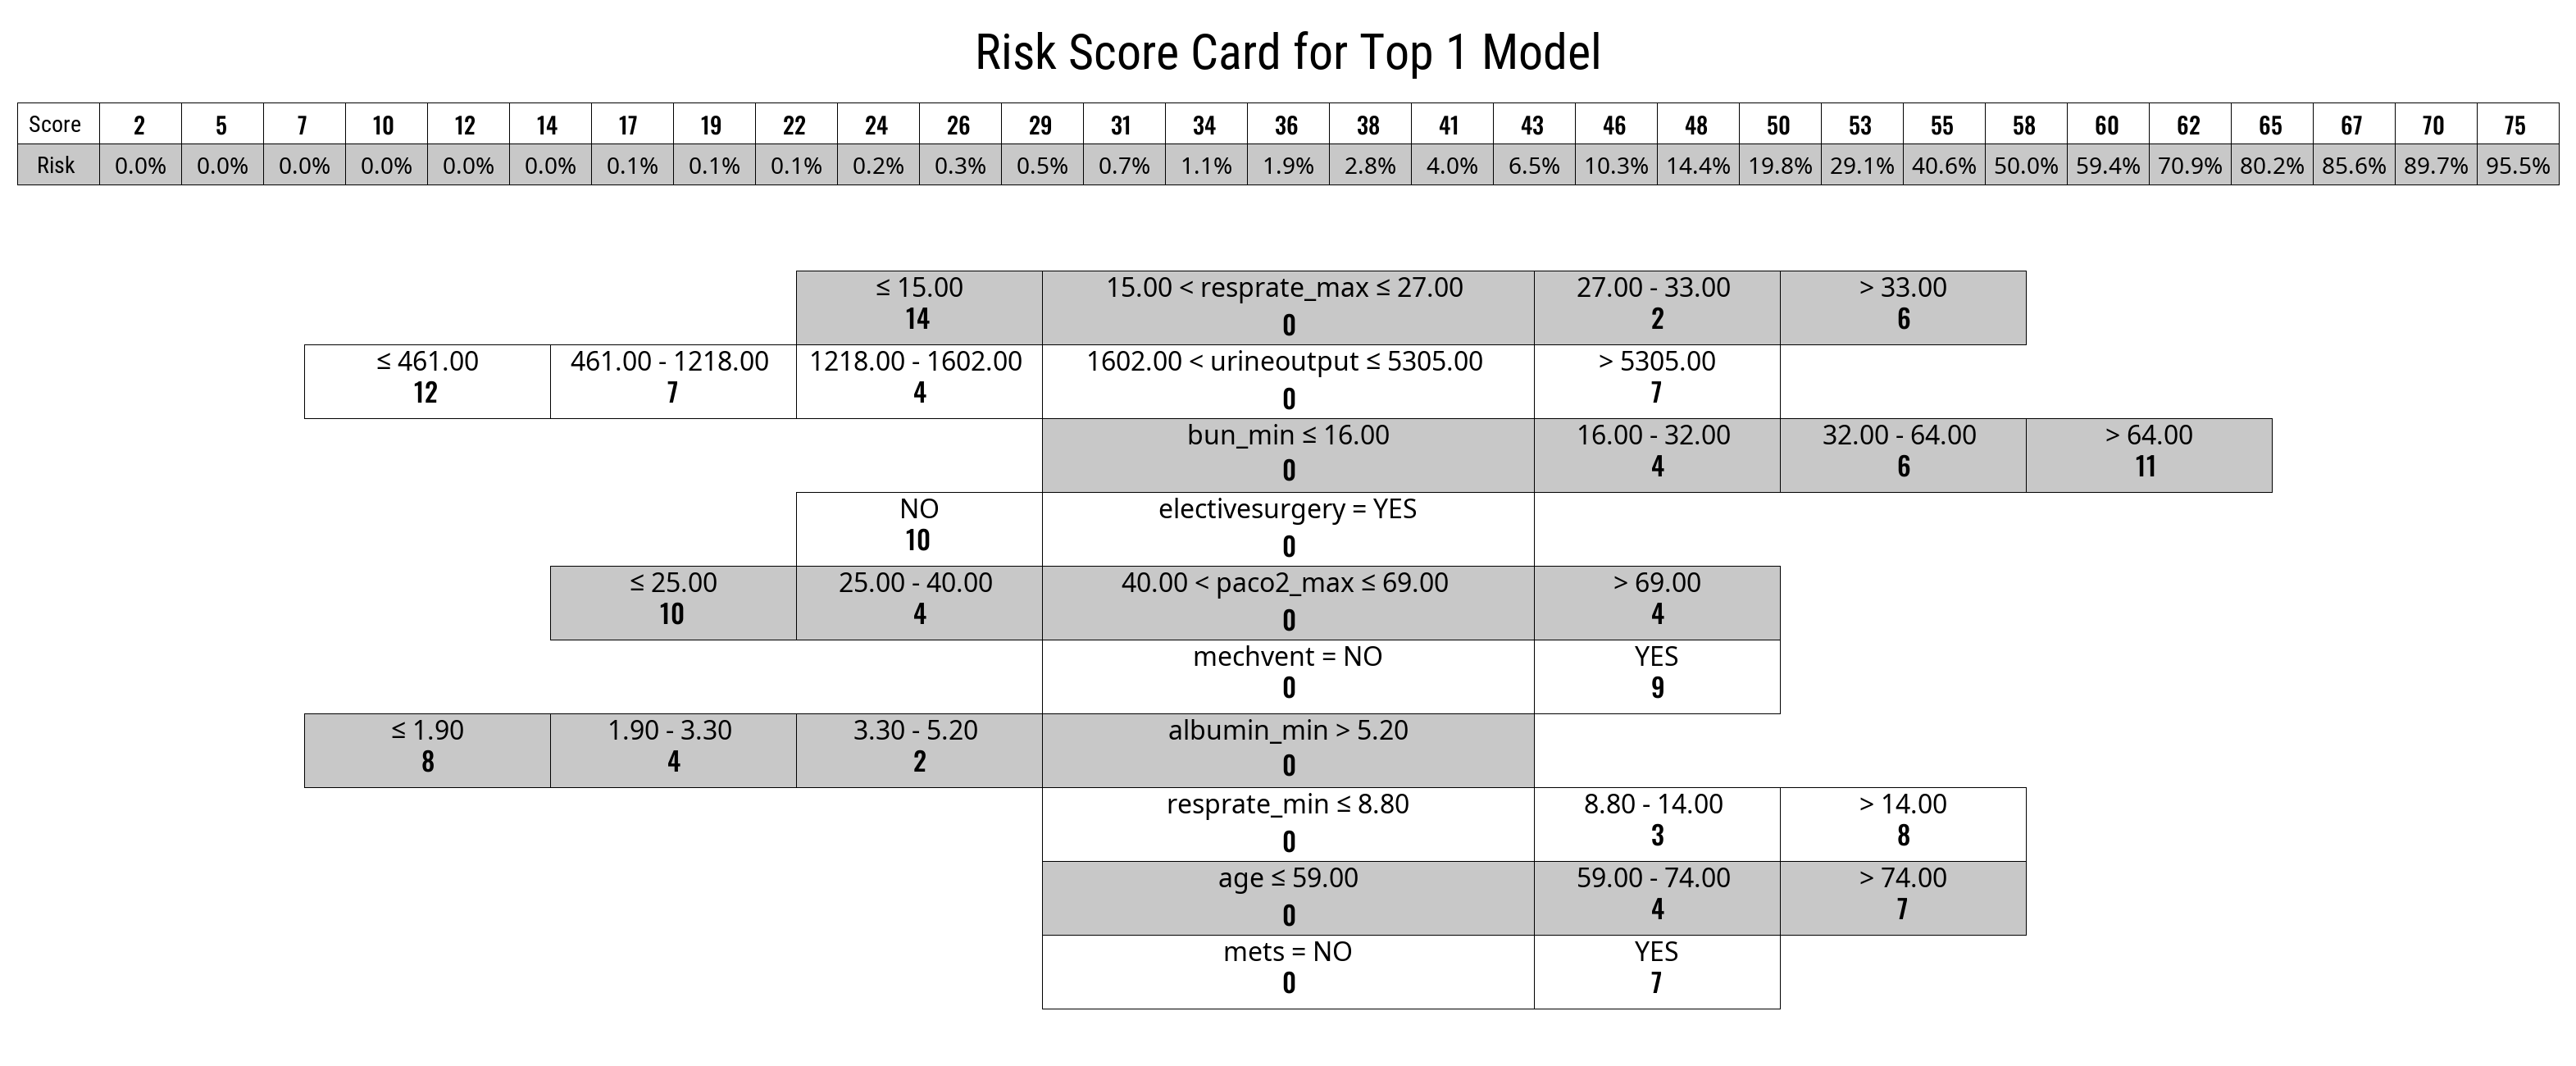

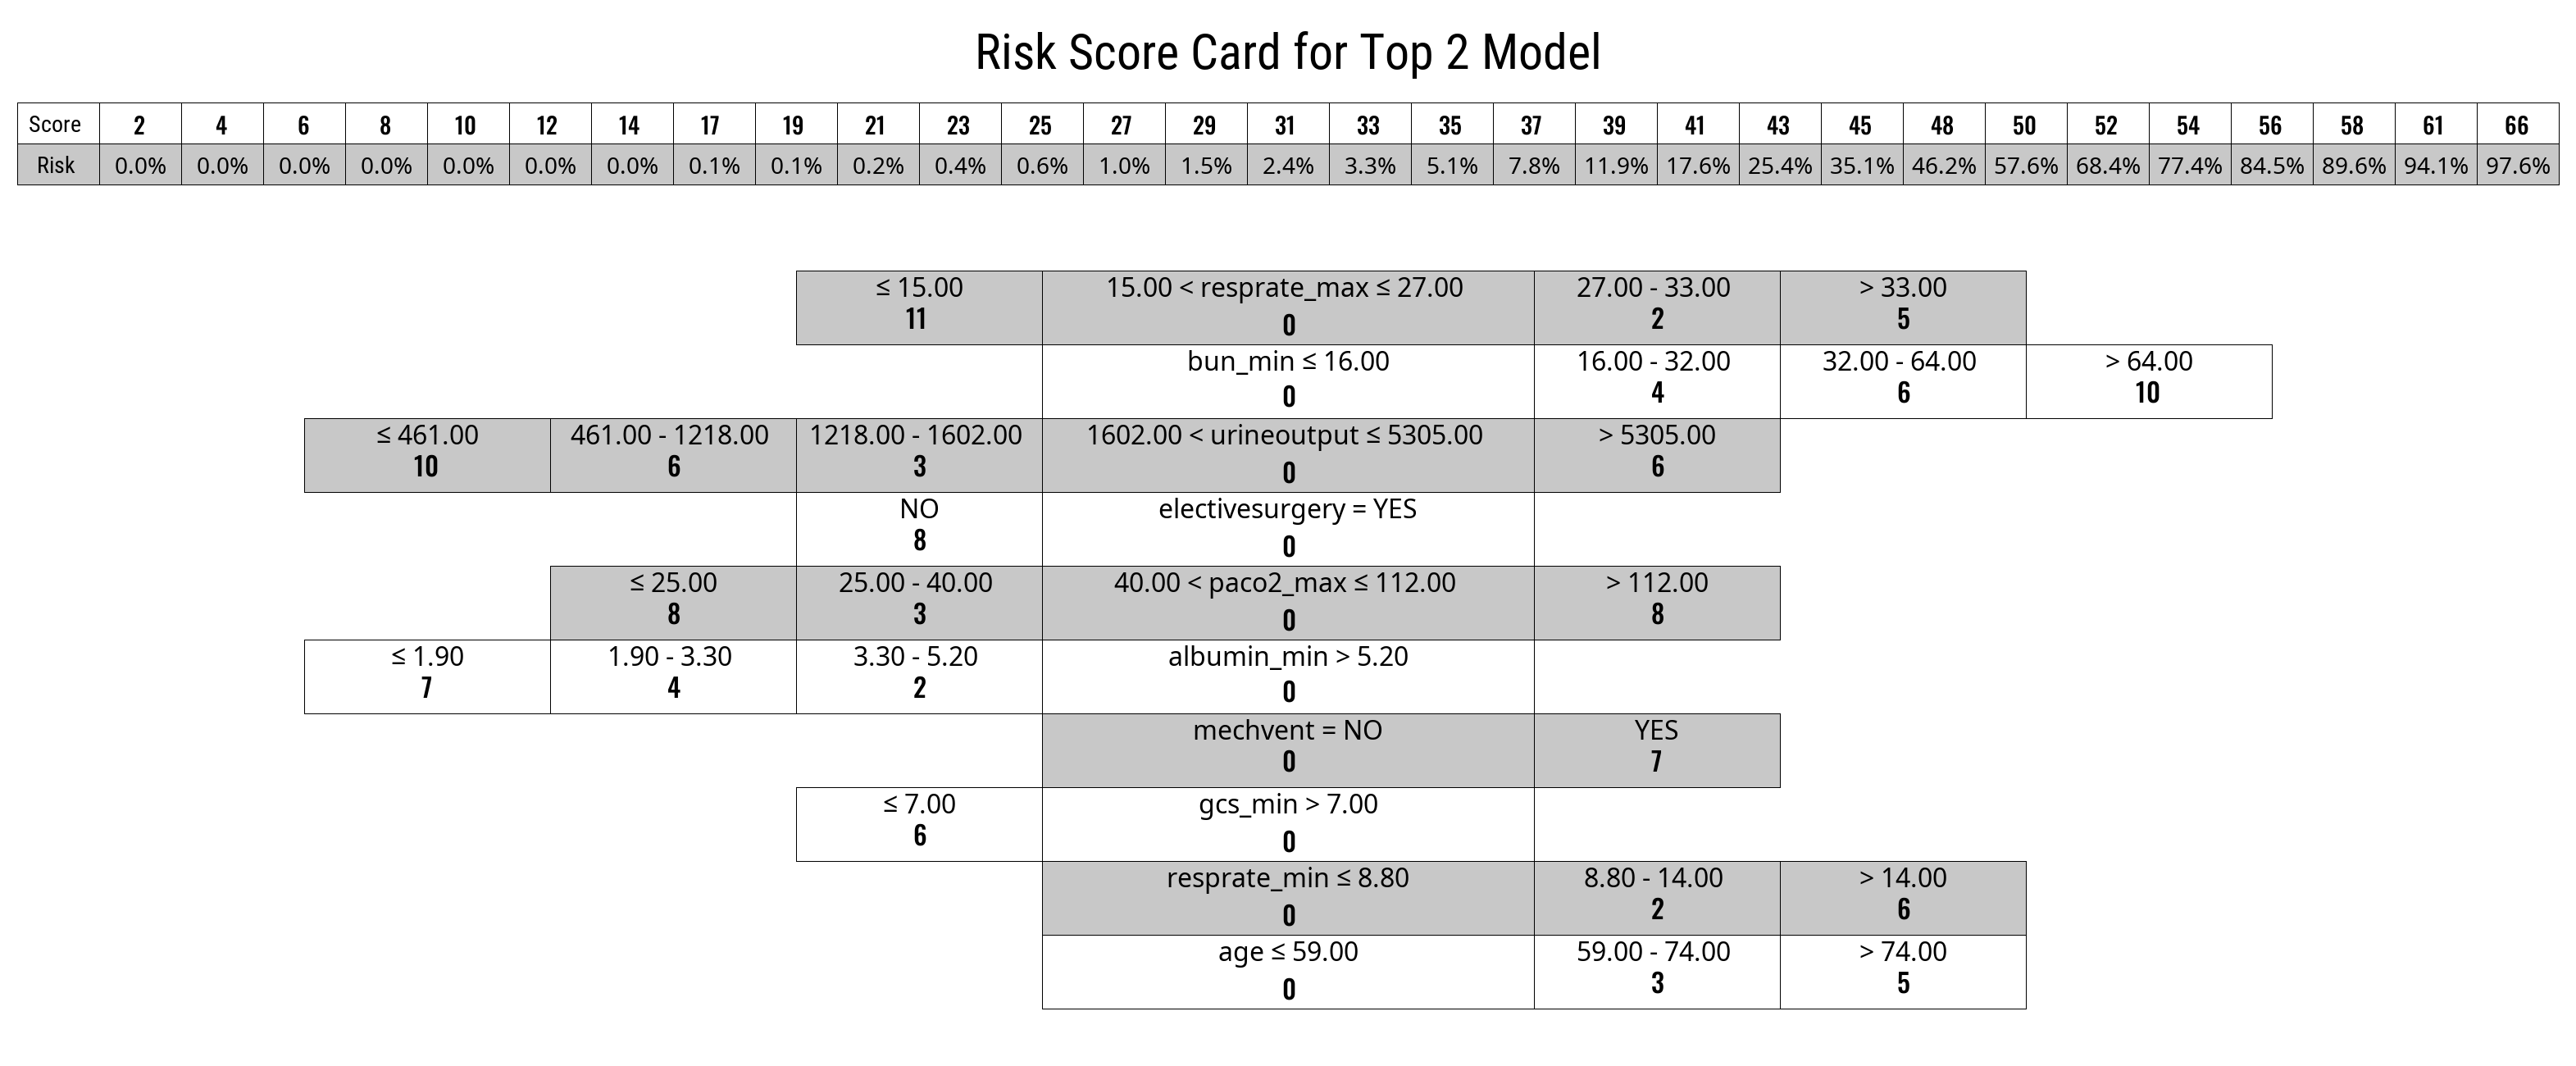

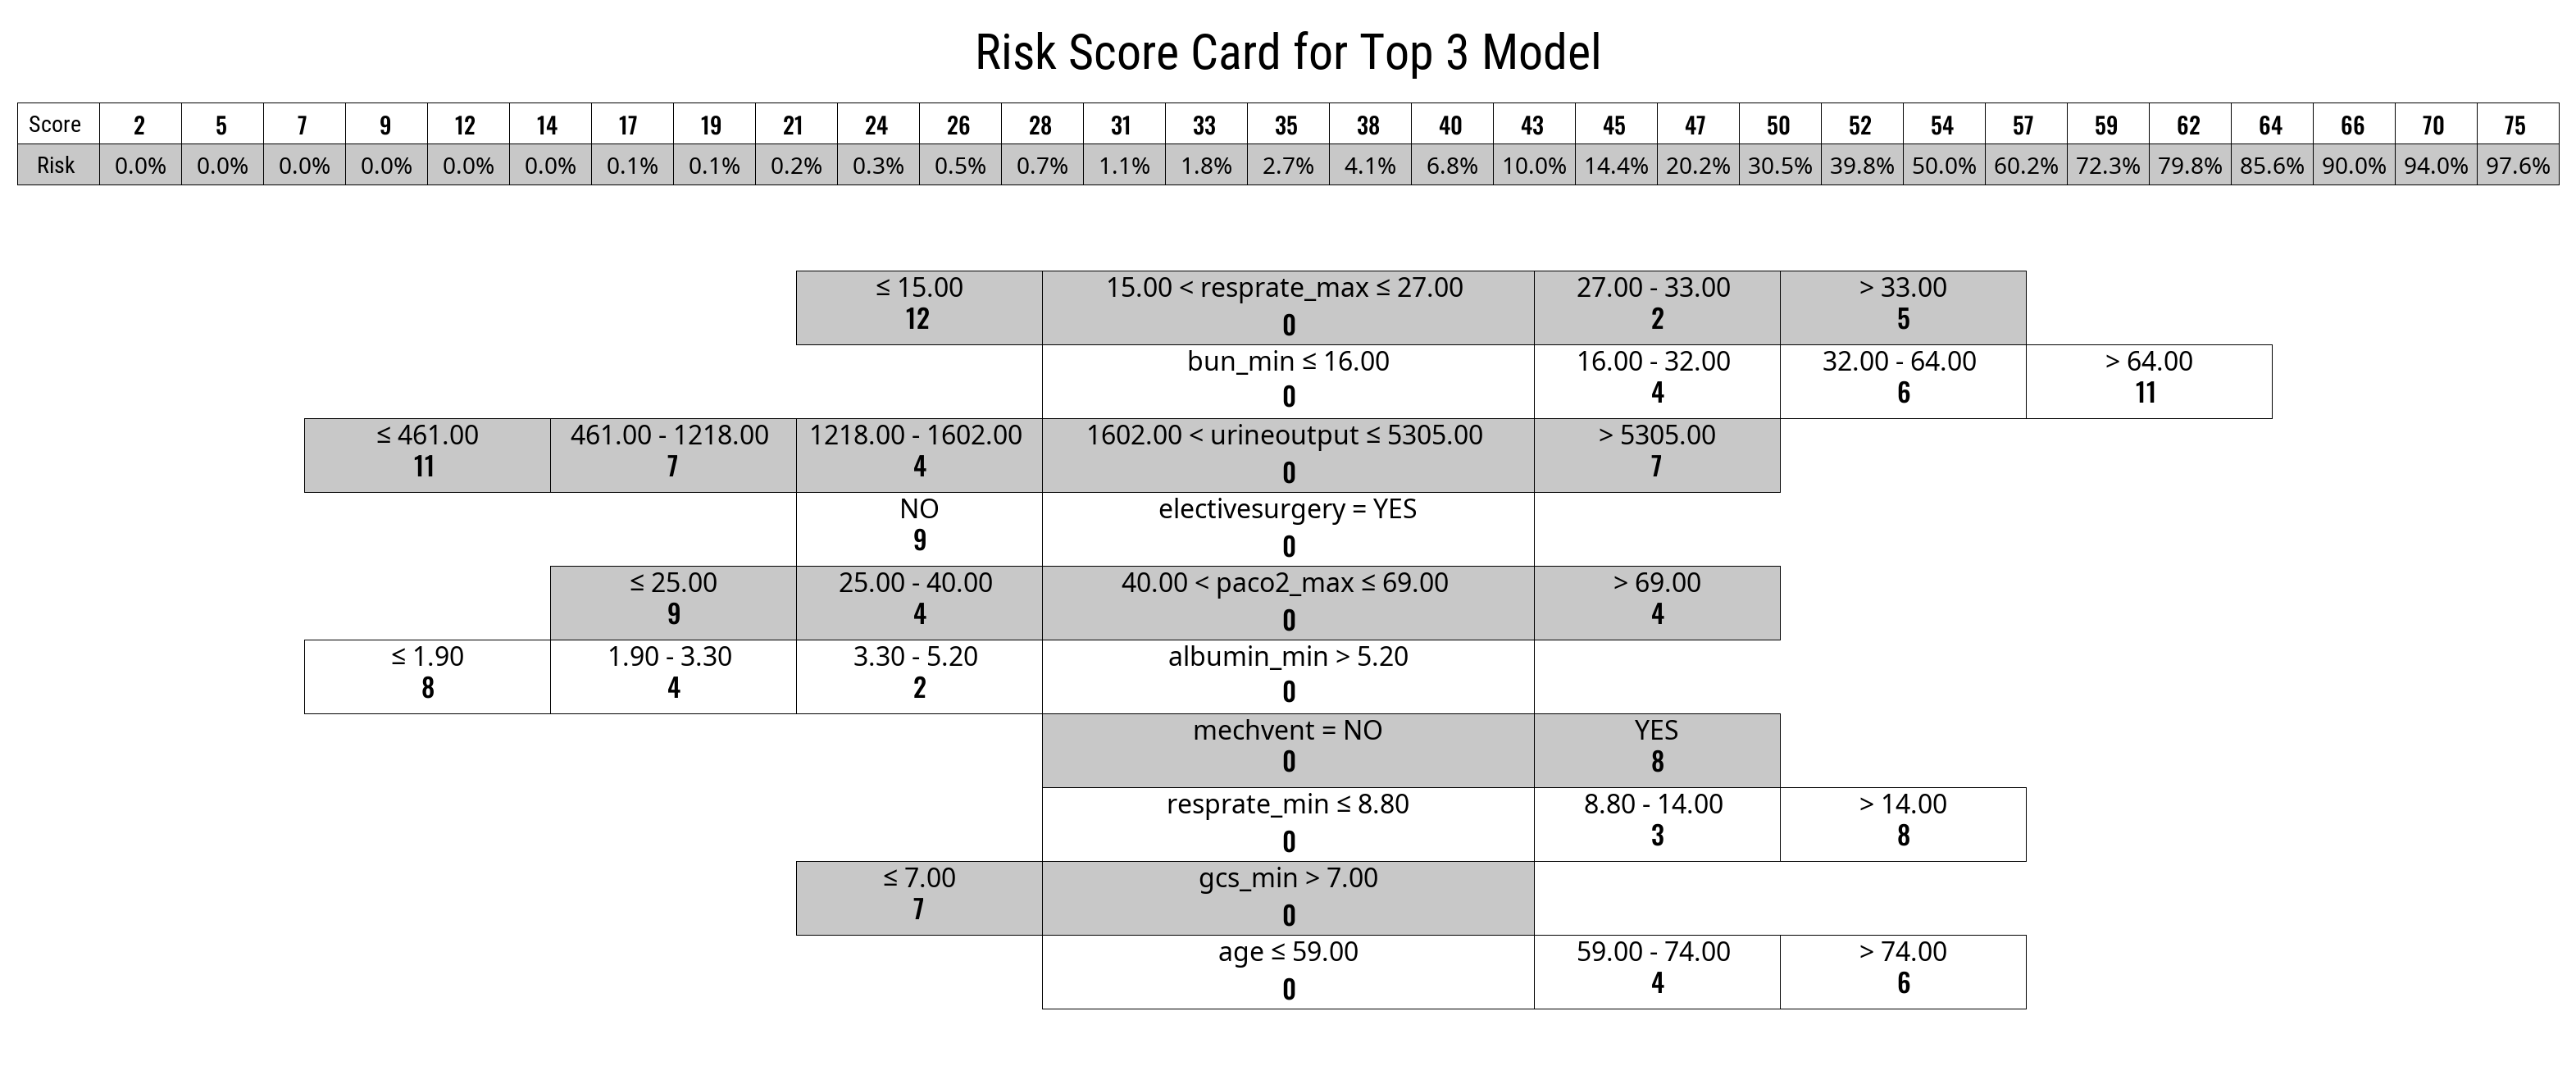

In [19]:
names = list(X_train_binarized.columns)
for i in range(3):
    card = fasterrisk.visualize_risk_card(names, X_train_binarized, model_idx=i, title=f'Risk Score Card for Top {i+1} Model')      
    display(card)